In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
import descartes
import mapclassify
from mycolorpy import colorlist as mcp
import datetime as dt
%matplotlib inline
mpl.rcParams['figure.dpi']= 96
mpl.style.use('ggplot')
print(gpd.__version__)

import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import scikit_posthocs as sp



ModuleNotFoundError: No module named 'geopandas'

In [2]:
dataBloom = pd.read_csv('dataBloom.csv')
dataBloom = dataBloom[(dataBloom.Waterbody_name != 'Mayatan Lake') & (dataBloom.Year != 2021)]
#display(dataBloom.info())

# Get unique values in Month column
print(dataBloom.Month.unique())

# Get counts of entries for each month
countPerMonth = dataBloom.groupby('Month').count()
display(countPerMonth)

# Since majority of data is collected in Months-6, 7, 8 (June, July and August), we will keep data only for these months
#dataBloom = dataBloom[(dataBloom['Month'] >= 6) & (dataBloom['Month'] <= 8)]
#countPerMonth = dataBloom.groupby('Month').count()
#display(countPerMonth)

display(dataBloom.info())

[ 6  7  8  5  9 10  3]


,Sample_number,Waterbody_name,Beach_name,Beach_access_num,Latitude,Longitude,Collection_date,Collection_time,MC-LR_conc,Total_cyano_cell_count,...,Water_description_additional,Turbidity,Color,Water_temp,Wind_direction,Rainfall_24h_bool,Rainfall_24h_mm,EOB,Year,Day
Month,,,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
5,68,68,68,66,68,68,68,63,63,68,...,22,52,53,51,53,51,51,60,68,68
6,569,569,569,545,569,569,569,540,548,569,...,156,419,419,401,413,394,372,512,569,569
7,712,712,710,662,712,712,712,687,691,712,...,231,536,536,511,534,502,480,667,712,712
8,713,713,713,660,713,713,713,673,675,713,...,185,521,523,492,505,507,476,653,713,713
9,63,63,63,55,63,63,63,53,59,63,...,17,57,57,57,55,56,49,58,63,63
10,5,5,5,5,5,5,5,5,5,5,...,3,5,5,5,5,5,5,5,5,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 0 to 2131
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sample_number                 2131 non-null   object 
 1   Waterbody_name                2131 non-null   object 
 2   Beach_name                    2129 non-null   object 
 3   Beach_access_num              1994 non-null   float64
 4   Latitude                      2131 non-null   float64
 5   Longitude                     2131 non-null   float64
 6   Collection_date               2131 non-null   object 
 7   Collection_time               2022 non-null   object 
 8   MC-LR_conc                    2042 non-null   object 
 9   Total_cyano_cell_count        2131 non-null   float64
 10  Microcystis_mcyE              1390 non-null   float64
 11  Anabaena_mcyE                 1390 non-null   float64
 12  Planktothrix_mcyE             1390 non-null   float64
 13  Sam

None

In [3]:
# Convert latitude and longitude data to geometry
# Specify crs 
#crs = {'init': 'ESPG:4326'}
crs = u'epsg:'+str(4326)

geometry = [Point(xy) for xy in zip(dataBloom['Longitude'], dataBloom['Latitude'])]
display(len(geometry))
dataBloom['geometry'] = geometry
display(dataBloom.head())

2131

,Sample_number,Waterbody_name,Beach_name,Beach_access_num,Latitude,Longitude,Collection_date,Collection_time,MC-LR_conc,Total_cyano_cell_count,...,Color,Water_temp,Wind_direction,Rainfall_24h_bool,Rainfall_24h_mm,EOB,Year,Month,Day,geometry
0,M141973,Baptiste Lake,Baptiste Lake Public Beach,8830387.0,54.726988,-113.568914,2014-06-24,15:30:00,NaN,532110.0,...,Green,20.2,NE,True,NaN,streaks on the surface,2014,6,24,POINT (-113.568914 54.726988)
1,M141680,Beaver Lake,Young's Beach,9621938.0,54.753226,-111.925127,2014-07-29,11:30:00,0.52,1793582.0,...,NaN,NaN,NaN,NaN,NaN,streaks on the surface,2014,7,29,POINT (-111.925127 54.753226)
2,M141971,Bonnie Lake,Bonnie Lake Campground Beach,9013424.0,54.146363,-111.881312,2014-07-25,14:00:00,0.07,0.0,...,NaN,NaN,NaN,NaN,NaN,streaks on the surface,2014,7,25,POINT (-111.881312 54.146363)
3,M141382,Chestermere Lake,Camp Chestermere Beach,8805982.0,51.020865,-113.818185,2014-06-04,15:00:00,<0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,not apparent,2014,6,4,POINT (-113.818185 51.020865)
4,M141386,Chestermere Lake,Camp Chestermere Beach,8805982.0,51.020865,-113.818185,2014-06-11,13:30:00,<0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,not apparent,2014,6,11,POINT (-113.818185 51.020865)


We will use the year 2016 as an example to plot the mean cyanobacterial cell count for each waterbody along with the Alberta cities, towns and villages on the munipality map. 

- For the main analysis, we will use some criteria toselect the year for comparison of different lakes in terms of their cyanobacterial counts and their proximity to cities, towns or villages. 
- Need to figure out a way to calculate the distance of the lakes from the nearest city, town and village for a more quantitative measure of the correlation between cyanobacterial counts and the proximities to these municipalities. Luckily, geo pandas has a way to make such distance calculations. 


In [4]:
# Average Total_cyano_cell_count data aggregated over the entire period
avgCellCounts = dataBloom[['Waterbody_name', 'geometry', 'Total_cyano_cell_count']].groupby('Waterbody_name').agg({'Total_cyano_cell_count':'mean',
                                                                               'geometry': 'first'}, skipna = True).sort_values('Total_cyano_cell_count', ascending=False).reset_index()
print(len(avgCellCounts))
display(avgCellCounts[:50])


97


,Waterbody_name,Total_cyano_cell_count,geometry
0,Bullshead Reservoir,3.381348e+06,POINT (-110.516857259 49.6778870436)
1,Acadia Valley Reservoir,2.523260e+06,POINT (-110.256959 51.099371)
2,Beaver Lake,1.793582e+06,POINT (-111.925127 54.753226)
3,Steele (Cross) Lake,1.707050e+06,POINT (-113.794963 54.652335)
4,Skeleton Lake,1.115749e+06,POINT (-112.726508 54.61404)
5,Berry Creek Reservoir,1.107953e+06,POINT (-111.635259 51.258069)
6,Devil's Lake (Matchayaw Lake),1.037448e+06,POINT (-114.093919 53.714757)
7,Milk River Ridge Reservoir,9.108355e+05,POINT (-112.556819 49.363377)
8,Lac Ste. Anne,6.346510e+05,POINT (-114.493872 53.702638)
9,Lessard Lake,5.756717e+05,POINT (-114.65562 53.777495)


In [5]:
# Create geodataframe from the dataset
geo_df_CellCounts = gpd.GeoDataFrame(avgCellCounts, # specify dataset
                         crs = crs, # Specify our coordinate reference system
                         geometry = avgCellCounts['geometry']) # Specify the geometry list created
                          
display(geo_df_CellCounts.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Waterbody_name          97 non-null     object  
 1   Total_cyano_cell_count  97 non-null     float64 
 2   geometry                97 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.4+ KB


None

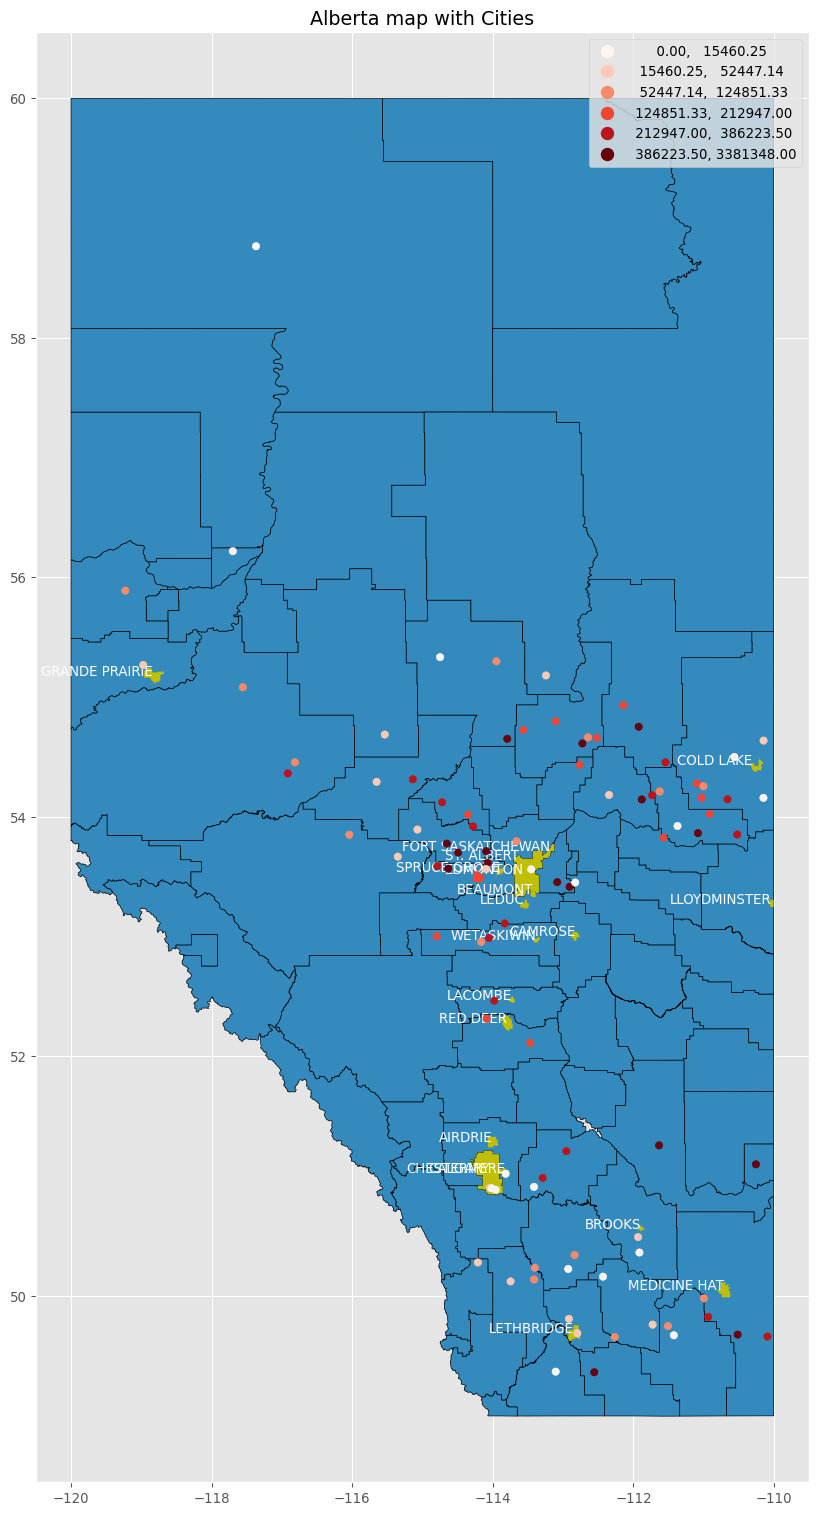

In [6]:
# Read shape file for Alberta city boundary
city_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/CITY.shp')
city_map['coords'] = city_map['geometry'].apply(lambda x: x.representative_point().coords[:])
city_map['coords'] = [coords[0] for coords in city_map['coords']]
rural_municipality_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/RURAL.shp')
town_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/TOWN.shp')
village_map =  gpd.read_file('./Municipal_Boundaries_SHP_Geographic/VILLAGE.shp')
SVillage_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/SVILLAGE.shp')
urban_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/urbserv.shp')


#display(rural_municipality_map.info())

fig, ax = plt.subplots(figsize= (15,15))
#ax.text(0.1, 0.9, 'text', ha='center', va='center',fontsize=10)
rural_municipality_map.plot(ax=ax, edgecolor='black', zorder=1)
p1 = city_map.plot(ax=ax, color='y', label='city')
for idx, row in city_map.iterrows():
    plt.annotate(text=row['GEONAME'][8:], xy=row['coords'],
                 horizontalalignment='right', fontsize=10, color='w', zorder=2)
#p2 = town_map.plot(ax=ax, color='k', label='town')
#p3 = village_map.plot(ax=ax, color='b', label='village')



geo_df_CellCounts.plot(ax=ax, column='Total_cyano_cell_count', 
                         scheme='quantiles', k=6, cmap='Reds', legend=True, markersize=30, zorder=3)


ax.set_title('Alberta map with Cities')
fig.set_size_inches(20,20)


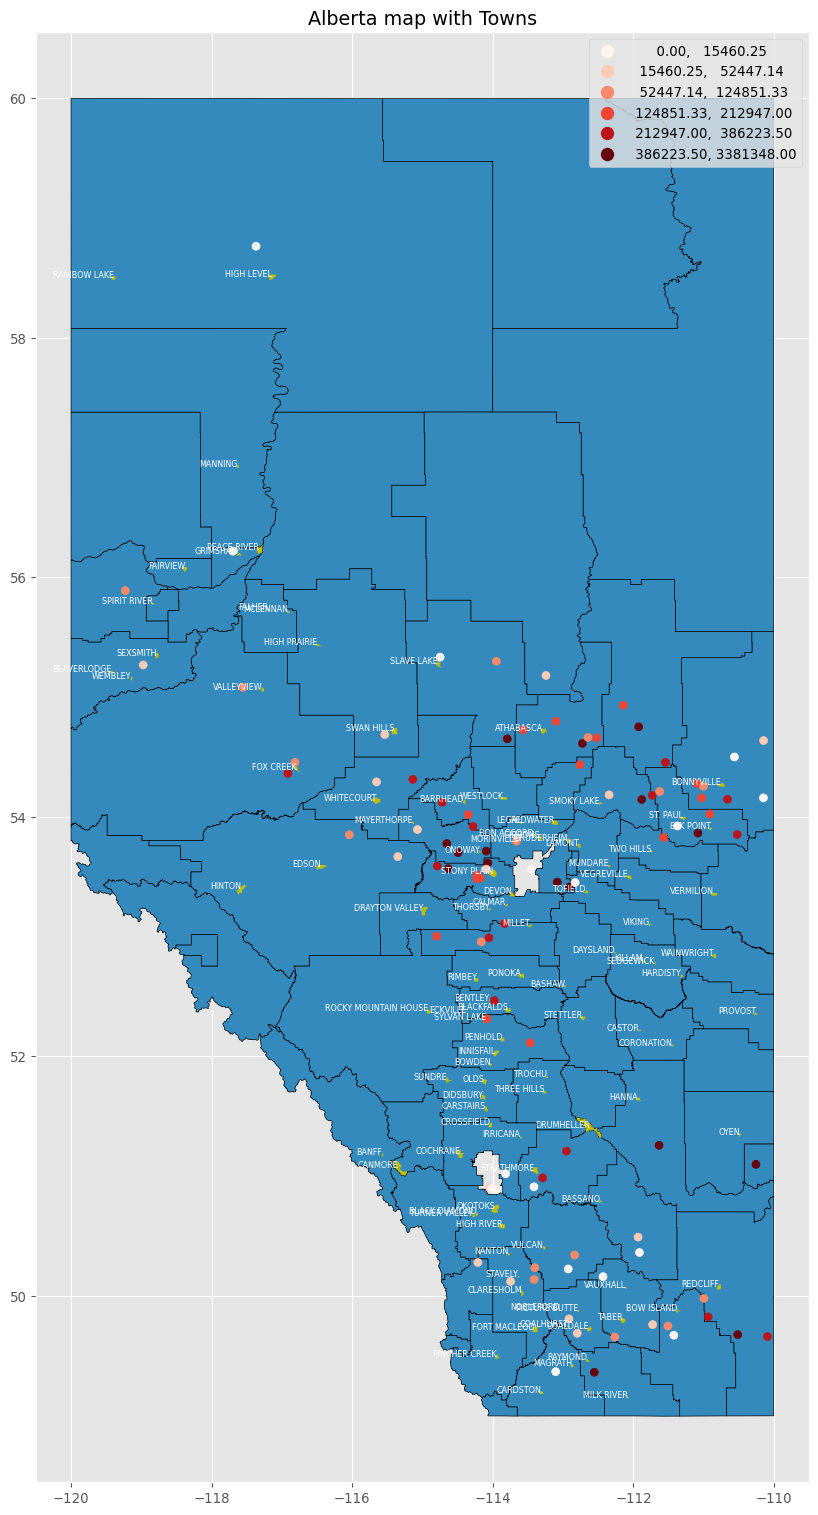

In [7]:
town_map = gpd.read_file('./Municipal_Boundaries_SHP_Geographic/TOWN.shp')
town_map['coords'] = town_map['geometry'].apply(lambda x: x.representative_point().coords[:])
town_map['coords'] = [coords[0] for coords in town_map['coords']]
fig, ax = plt.subplots(figsize= (15,15))
#ax.text(0.1, 0.9, 'text', ha='center', va='center',fontsize=10)
rural_municipality_map.plot(ax=ax, edgecolor='black')

p2 = town_map.plot(ax=ax, color='y', label='town')
for idx, row in town_map.iterrows():
    plt.annotate(text=row['GEONAME'][8:], xy=row['coords'],
                 horizontalalignment='right', fontsize=6, color='w')


geo_df_CellCounts.plot(ax=ax, column='Total_cyano_cell_count', 
                         scheme='quantiles', k=6, cmap='Reds', legend=True)

ax.set_title('Alberta map with Towns')
fig.set_size_inches(20,20)

Further Refining Steps:
1. Plot the statistics of cyanobacterial counts for all lakes aggregated over the years. This will show the distribution of the feature over the years 

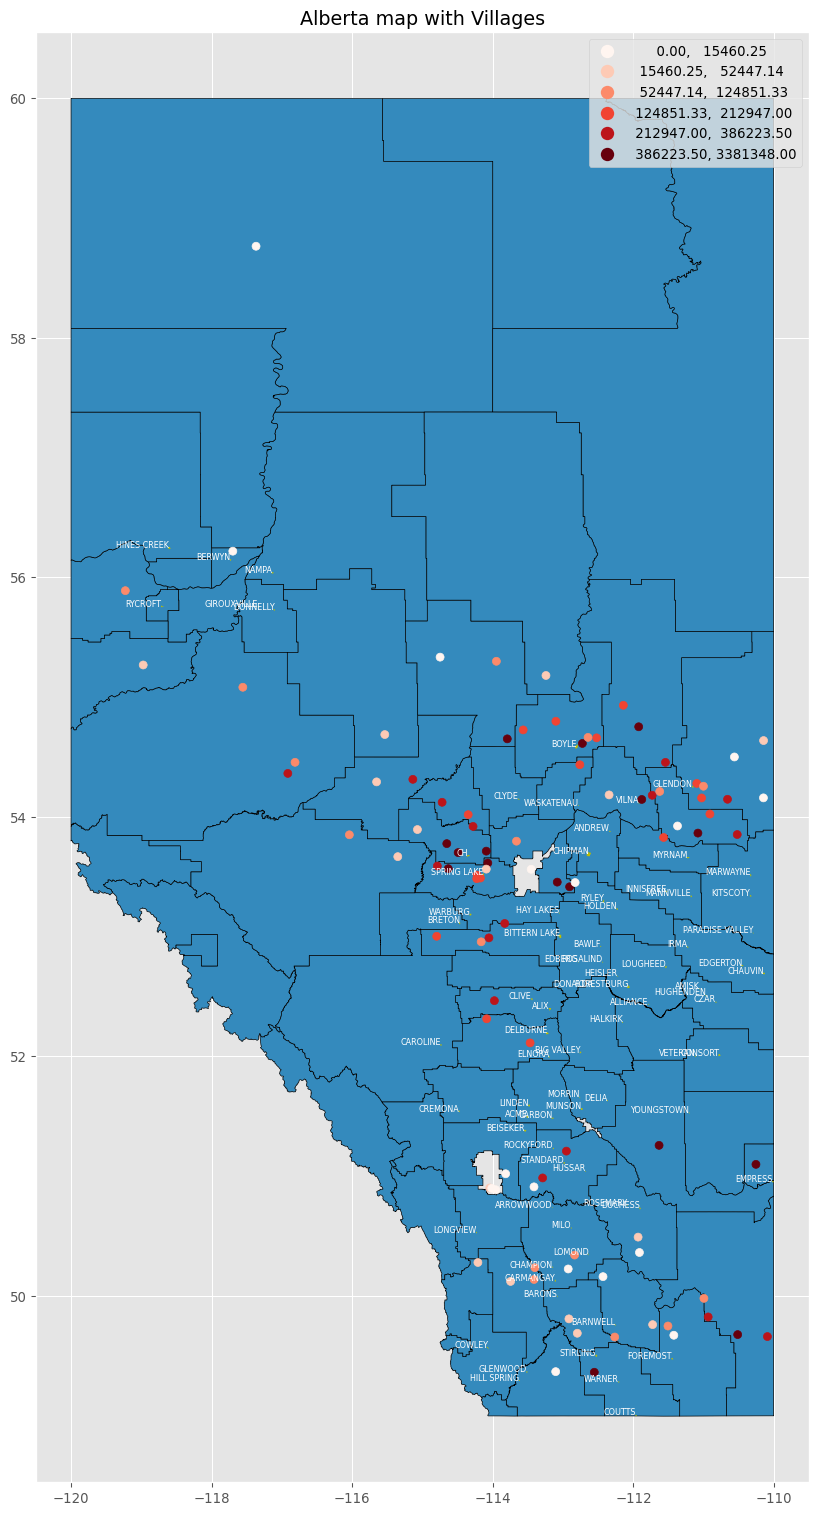

In [8]:
village_map =  gpd.read_file('./Municipal_Boundaries_SHP_Geographic/VILLAGE.shp')
village_map['coords'] = village_map['geometry'].apply(lambda x: x.representative_point().coords[:])
village_map['coords'] = [coords[0] for coords in village_map['coords']]

fig, ax = plt.subplots(figsize= (15,15))
#ax.text(0.1, 0.9, 'text', ha='center', va='center',fontsize=10)
rural_municipality_map.plot(ax=ax, edgecolor='black')
p3 = village_map.plot(ax=ax, color='y', label='village')
for idx, row in village_map.iterrows():
    plt.annotate(text=row['GEONAME'][11:], xy=row['coords'],
                 horizontalalignment='right', fontsize=6, color='w')




geo_df_CellCounts.plot(ax=ax, column='Total_cyano_cell_count', 
                         scheme='quantiles', k=6, cmap='Reds', legend=True)

#ax.legend(reversed(handles), labels, title='Boundary', loc='upper left')
ax.set_title('Alberta map with Villages')
fig.set_size_inches(20,20)

In [29]:
# convert to world mercator which has units of meters
# https://epsg.io/3395
geo_df_CellCounts.geometry = geo_df_CellCounts.geometry.to_crs(epsg=3395)
city_map.geometry = city_map.geometry.to_crs(3395)
town_map.geometry = town_map.geometry.to_crs(3395)
village_map.geometry = village_map.geometry.to_crs(3395)

# Calculate distance of each waterbody to the cities in Alberta and find the nearest city
distToCities = geo_df_CellCounts.geometry.apply(lambda g: city_map.distance(g)).reset_index()

distToCities.columns = ['Waterbody_name'] + list(city_map['GEONAME'])
distToCities['Waterbody_name'] = geo_df_CellCounts['Waterbody_name']
distToCities = distToCities.melt(id_vars = ['Waterbody_name'], var_name = 'City', value_name='CityDistance')
display(len(distToCities))
nearestCityDist = distToCities.loc[distToCities.groupby('Waterbody_name')['CityDistance'].idxmin()]
display(len(nearestCityDist))

# Calculate distance of each waterbody to the Towns in Alberta and fine the nearest town
distToTowns = geo_df_CellCounts.geometry.apply(lambda g: town_map.distance(g)).reset_index()
distToTowns.columns = ['Waterbody_name'] + list(town_map['GEONAME'])
distToTowns['Waterbody_name'] = geo_df_CellCounts['Waterbody_name']
#display(distToTowns)
distToTowns = distToTowns.melt(id_vars = ['Waterbody_name'], var_name = 'Town', value_name='TownDistance')
nearestTownDist = distToTowns.loc[distToTowns.groupby('Waterbody_name')['TownDistance'].idxmin()]
display(len(nearestTownDist))

# Calculate distance of each waterbody to the Villages in Alberta and find the nearest village
distToVillages = geo_df_CellCounts.geometry.apply(lambda g: village_map.distance(g)).reset_index()
distToVillages.columns = ['Waterbody_name'] + list(village_map['GEONAME'])
distToVillages['Waterbody_name'] = geo_df_CellCounts['Waterbody_name']
#display(distToVillages)
distToVillages = distToVillages.melt(id_vars = ['Waterbody_name'], var_name = 'Village', value_name='VillageDistance')
nearestVillageDist = distToVillages.loc[distToVillages.groupby('Waterbody_name')['VillageDistance'].idxmin()]
display(len(nearestVillageDist))


1843

97

97

97

In [30]:
# Combine the datasets for the distances with the mean cyanobacterial counts for each lake

dfCountVsDist = avgCellCounts[['Waterbody_name', 'Total_cyano_cell_count']].merge(nearestCityDist, how='outer', on = 'Waterbody_name').merge(nearestTownDist, how='outer', on = 'Waterbody_name').merge(nearestVillageDist, how='outer', on = 'Waterbody_name')
display(dfCountVsDist)
dfCountVsNearest = dfCountVsDist.drop(columns = ['City', 'Town', 'Village']).rename(columns = {'CityDistance':'City',
                                                                                              'TownDistance': 'Town',
                                                                                              'VillageDistance': 'Village'})
display(dfCountVsNearest.sort_values('Total_cyano_cell_count')[40:])
dfCountVsNearest = dfCountVsNearest.melt(id_vars = ['Waterbody_name', 'Total_cyano_cell_count'], var_name = 'NearestMunicipality', value_name='Distance')
dfCountVsNearest = dfCountVsNearest.loc[dfCountVsNearest.groupby('Waterbody_name')['Distance'].idxmin()]
display(dfCountVsNearest)

fig = px.box(dfCountVsNearest, x='NearestMunicipality', y ='Total_cyano_cell_count',
            hover_data=dfCountVsNearest.columns,
            labels = {
                'NearestMunicipality': 'Nearest Municipality'
            })

fig.show()

# Identify outliers
outliers = ['Acadia Valley Reservoir', 'Beaver Lake', 'Skeleton Lake', 
            'Steele (Cross) Lake', 'Devil\'s Lake (Matchayaw Lake)', 
            'Milk River Ridge Reservoir', 'Half Moon Lake', 'Bullshead Reservoir']



,Waterbody_name,Total_cyano_cell_count,City,CityDistance,Town,TownDistance,Village,VillageDistance
0,Bullshead Reservoir,3.381348e+06,CITY OF MEDICINE HAT,54845.797563,TOWN OF REDCLIFF,69716.855390,VILLAGE OF FOREMOST,107743.979933
1,Acadia Valley Reservoir,2.523260e+06,CITY OF MEDICINE HAT,179080.387461,TOWN OF OYEN,48003.873852,VILLAGE OF EMPRESS,35244.015605
2,Beaver Lake,1.793582e+06,CITY OF COLD LAKE,186541.846051,TOWN OF SMOKY LAKE,133948.247037,VILLAGE OF BOYLE,99886.906749
3,Steele (Cross) Lake,1.707050e+06,CITY OF FORT SASKATCHEWAN,181328.953427,TOWN OF ATHABASCA,53974.421365,VILLAGE OF CLYDE,96446.960508
4,Skeleton Lake,1.115749e+06,CITY OF FORT SASKATCHEWAN,165448.845379,TOWN OF ATHABASCA,59070.718867,VILLAGE OF BOYLE,6767.522817
...,...,...,...,...,...,...,...,...
92,Chestermere Lake,5.184878e+02,CITY OF CHESTERMERE,0.000000,TOWN OF STRATHMORE,41432.145589,VILLAGE OF BEISEKER,68850.880648
93,Sikome Lake,0.000000e+00,CITY OF CALGARY,0.000000,TOWN OF OKOTOKS,24980.573442,VILLAGE OF LONGVIEW,67957.953609
94,Lac Cardinal (Bear Lake),0.000000e+00,CITY OF GRANDE PRAIRIE,226245.357233,TOWN OF GRIMSHAW,8351.259608,VILLAGE OF BERWYN,13755.015302
95,Crane (Moore) Lake,0.000000e+00,CITY OF COLD LAKE,27477.513635,TOWN OF BONNYVILLE,45008.611324,VILLAGE OF GLENDON,79818.970700


,Waterbody_name,Total_cyano_cell_count,City,Town,Village
56,Clear Lake,7.736308e+04,90768.668479,24167.114550,32496.850490
55,Yellow Lake,8.131550e+04,92761.767203,23507.114417,46062.291158
54,Battle Lake,8.666400e+04,81365.173544,49160.954666,42967.442398
53,Hope Lake,9.087831e+04,177309.131036,65818.897533,19475.086803
52,Twin Valley Reservoir,9.163772e+04,103175.733567,28168.199162,27604.376675
51,Sturgeon Lake,1.070546e+05,126702.316096,29147.343923,132429.160720
50,Moose Lake,1.088127e+05,81489.748631,22150.902899,15335.078770
49,Lake McGregor,1.217503e+05,101264.660062,46605.393019,20784.531864
48,Floatingstone Lake,1.248513e+05,149642.282610,51806.020908,36545.088170
47,Lac La Biche,1.268547e+05,221889.235863,128056.472495,95537.141289


,Waterbody_name,Total_cyano_cell_count,NearestMunicipality,Distance
195,Acadia Valley Reservoir,2.523260e+06,Village,35244.015605
88,Auburn Bay,4.722500e+03,City,0.000000
236,Bangs Lake,1.445805e+05,Village,20676.754512
135,Baptiste Lake,1.695846e+05,Town,27564.843029
248,Battle Lake,8.666400e+04,Village,42967.442398
...,...,...,...,...
283,Travers Reservoir,4.182521e+03,Village,23976.191244
246,Twin Valley Reservoir,9.163772e+04,Village,27604.376675
206,Wabamun Lake,5.143830e+05,Village,34585.049229
125,Wizard Lake,2.378136e+05,Town,26545.180424


### Statistical Analysis of Mean Cyanobacterial Counts vs Nearest Municipality Type

In [20]:
# Pie chart for the counts of municipality types nearest to the lakes
fig = px.pie(dfCountVsNearest, 'NearestMunicipality',
            hover_name='Waterbody_name',
            title='Nearest Municipalities to Alberta Lakes')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

C:\Users\radhi\anaconda3\lib\site-packages\bioinfokit\analys.py:365: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Village,City,116754.305333,-249262.115630,482770.726296,1.074336,0.710319
1,Village,Town,179494.399846,-98830.053985,457818.853677,2.172037,0.279360
2,City,Town,62740.094513,-278637.273739,404117.462765,0.618982,0.893704


C:\Users\radhi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



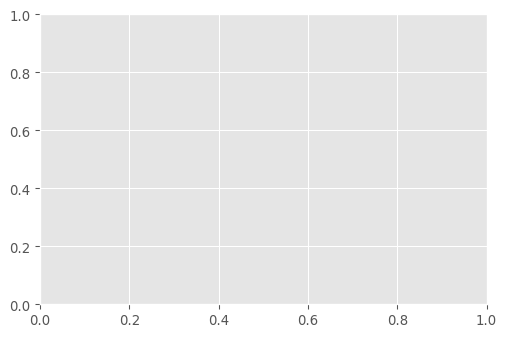

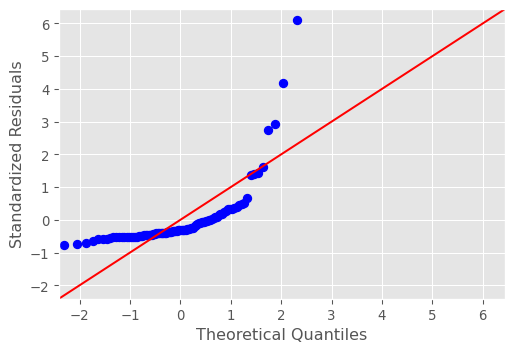

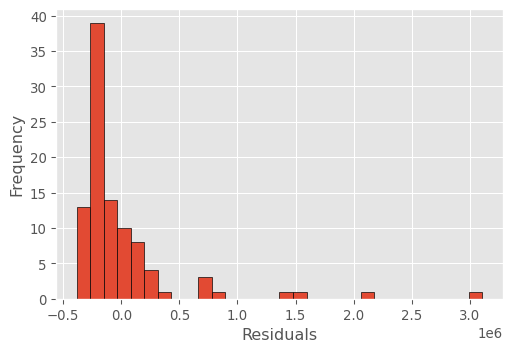

In [35]:
# Perform ANOVA
df = dfCountVsNearest[['Waterbody_name', 'NearestMunicipality', 'Total_cyano_cell_count']].pivot(index='Waterbody_name', 
                                                                                                columns='NearestMunicipality',
                                                                                                values='Total_cyano_cell_count')
#display(df)

df = dfCountVsNearest[['Waterbody_name', 'NearestMunicipality', 'Total_cyano_cell_count']].set_index('Waterbody_name')
#print(df)
res = stat()
# for main effect Genotype
res.tukey_hsd(df=df, res_var='Total_cyano_cell_count', xfac_var='NearestMunicipality', anova_model='Total_cyano_cell_count~C(NearestMunicipality)')
display(res.tukey_summary)


# QQ-plot
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [25]:
# Perform Kruskall-Wallis test
df = dfCountVsNearest[['Waterbody_name', 'NearestMunicipality', 'Total_cyano_cell_count']].pivot(index='Waterbody_name', 
                                                                                                columns='NearestMunicipality',
                                                                                                values='Total_cyano_cell_count')
#display(df)
stats.kruskal(df['City'], df['Town'], df['Village'], nan_policy='omit')

# Posthoc test
df = dfCountVsNearest[['Waterbody_name', 'NearestMunicipality', 'Total_cyano_cell_count']].set_index('Waterbody_name')
#print(df)
sp.posthoc_dunn(df, val_col='Total_cyano_cell_count', group_col='NearestMunicipality', p_adjust = 'holm')


,City,Town,Village
City,1.000000,0.074919,0.001788
Town,0.074919,1.000000,0.074919
Village,0.001788,0.074919,1.000000


Correlations between distance to the nearest village and mean cyanobacterial counts for the lakes

In [27]:
# Data after removing outliers
data = dfCountVsDist[~dfCountVsDist['Waterbody_name'].isin(outliers)]

# Scatterplot for Villages
## Correlation Coefficient
corr = stats.spearmanr(data['VillageDistance'], data['Total_cyano_cell_count'])

fig = px.scatter(data, x='VillageDistance', y='Total_cyano_cell_count', trendline="ols",
                hover_name='Waterbody_name',
                 labels={
                     "VillageDistance": "Distance to the Nearest Village",
                     "Total_cyano_cell_count": "Mean Cyanobacterial Cell Count (cells/ml)",
                 })
                
# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0.6,
                                        y=0.9,
                                        showarrow=False,
                                        text= "Spearman's rho: " + str(round(corr[0], 2)) +"\nPVal: " + str(round(corr[1], 2)),
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


# Scatterplot for 
corr = stats.spearmanr(data['TownDistance'], data['Total_cyano_cell_count'])
fig = px.scatter(data, x='TownDistance', y='Total_cyano_cell_count', trendline="ols",
                hover_name='Waterbody_name',
                 labels={
                     "VillageDistance": "Distance to the Nearest Town",
                     "Total_cyano_cell_count": "Mean Cyanobacterial Cell Count (cells/ml)",
                 })
# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0.6,
                                        y=0.9,
                                        showarrow=False,
                                        text= "Spearman's rho: " + str(round(corr[0], 2)) +"\nPVal: " + str(round(corr[1], 2)),
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
fig.show()

# Scatterplot for Cities
corr = stats.spearmanr(data['CityDistance'], data['Total_cyano_cell_count'])
fig = px.scatter(data, x='CityDistance', y='Total_cyano_cell_count', trendline="ols",
                hover_name='Waterbody_name',
                 labels={
                     "VillageDistance": "Distance to the Nearest City",
                     "Total_cyano_cell_count": "Mean Cyanobacterial Cell Count (cells/ml)",
                 })
# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0.6,
                                        y=0.9,
                                        showarrow=False,
                                        text= "Spearman's rho: " + str(round(corr[0], 2)) +"\nPVal: " + str(round(corr[1], 2)),
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
fig.show()